In [1]:
from qiskit_metal import draw, Dict
from qiskit_metal.qlibrary.core.base import QComponent
import numpy as np
from qiskit_metal.toolbox_metal import math_and_overrides
from qiskit_metal import designs, MetalGUI

In [2]:
# creating WGM resonator 
class WGR( QComponent ) :
    # This creates a simple WGM resonator embedded with a transmon qubi
    """ default_options = outer_cir_radius: radius of outer circle 
                        outer_cir_pos_x: position of outer circle center x component
                        outer_cir_pos_y: position of outer circle center y component
                        {transmon_params: { tras_pos_x: position of outer rect x coord
                                            trans_pos_y: position of outer rect y coord
                                            trans_width: width of outer rect 
                                            trans_len: length of outer rect 
                                            }
                        transmon_inner_pad: { trans_inner_pad_pos_x: position of inner pad x ccord 
                                               trans_inner_pad_pos_y: 
                                               trans_inner_pad_width:
                                               trans_inner_pad_len:
                                               trans_edge_gap:
                                               }
                        inner_circle: { inner_cir_radius:
                                        inner_cir_pos_x:
                                        inner_cir_pos_y:
                                        }"""
    default_options = Dict( outer_cir_radius = '7.5mm', 
                            outer_cir_pos_x = '0.0mm',
                            outer_cir_pos_y = '0.0mm',
                            trans_edge_gap = '0.005mm',
                            trans_width = '1.0mm',
                            trans_len = '0.23mm',
                            trans_inner_pad_width = '0.05mm',
                            trans_inner_pad_len = '0.5mm',
                            inner_cir_raidus = '6.2mm',
                            layer = '1',
                            chip = 'main')
    component_metadata = Dict( short_name = 'WGM')
    # component metadata

                
    def make(self):
        """ convert self.options into QGeometry """
        p = self.parse_options()

        outer_circle = draw.shapely.geometry.Point( p.outer_cir_pos_x, p.outer_cir_pos_y).buffer( p.outer_cir_radius)
        outer_rect = draw.rectangle( p.trans_width, p.trans_len, (p.outer_cir_pos_x + p.outer_cir_radius-p.trans_edge_gap-p.trans_width/2), 
                                    p.outer_cir_pos_y)
        cir_trans_sub = draw.subtract( outer_circle, outer_rect)
        inner_pad = draw.rectangle ( p.trans_inner_pad_width, p.trans_inner_pad_len, (p.outer_cir_pos_x + p.outer_cir_radius - p.trans_edge_gap- p.trans_width/2), p.outer_cir_pos_y)
        inner_circle = draw.shapely.geometry.Point(1.0*(p.outer_cir_pos_x + p.outer_cir_radius- 2*p.trans_edge_gap - p.trans_width - p.inner_cir_radius),
                                                    p.outer_cir_pos_y).buffer( p.inner_cir_radius)
        outer_inner_cir_sub = draw.subtract( outer_circle,inner_circle)
        design1 = draw.union( cir_trans_sub, inner_pad, outer_inner_cir_sub)

        # now translate and rotate the final structure
        design1 = draw.rotate(design1, p.orientation, origin=(0, 0))
        design1 = draw.translate(design1, p.pos_x, p.pos_y)

        geom = {'design': design1}
        self.add_qgeometry('poly', geom, layer=p.layer)

In [3]:
design = designs.DesignPlanar()
gui = MetalGUI( design)
design.overwrite_enabled = True

In [4]:
c1 = WGR( design, 'C1')
gui.rebuild()
gui.autoscale()

06:19PM 24s ERROR [rebuild]: ERROR in building component name=C1, error=unsupported operand type(s) for -: 'float' and 'Dict'


TypeError: unsupported operand type(s) for -: 'float' and 'Dict'

In [254]:
c1 = draw.shapely.geometry.Point(0,0).buffer(6)
c2 = draw.shapely.geometry.Point(0.5,0).buffer(3.2)
c3 = draw.subtract( c1,c2)
shapely.get_exterior_ring( c3).buffer(1.5)
shapely.get_interior_ring( c3,2)

In [37]:
pip install pygeos



     ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
      --------------------------------------- 0.0/1.4 MB 330.3 kB/s eta 0:00:05
     -- ------------------------------------- 0.1/1.4 MB 975.2 kB/s eta 0:00:02
     ---- ----------------------------------- 0.2/1.4 MB 1.1 MB/s eta 0:00:02
     ------ --------------------------------- 0.2/1.4 MB 1.2 MB/s eta 0:00:02
     --------- ------------------------------ 0.3/1.4 MB 1.6 MB/s eta 0:00:01
     ---------- ----------------------------- 0.4/1.4 MB 1.4 MB/s eta 0:00:01
     ------------ --------------------------- 0.5/1.4 MB 1.4 MB/s eta 0:00:01
     --------------- ------------------------ 0.5/1.4 MB 1.5 MB/s eta 0:00:01
     ---------------- ----------------------- 0.6/1.4 MB 1.5 MB/s eta 0:00:01
     ------------------ --------------------- 0.7/1.4 MB 1.5 MB/s eta 0:00:01
     -------------------- ------------------- 0.7/1.4 MB 1.5 MB/s eta 0:00:01
     ------------------------ --------------- 0.9/1.4 MB 1.6 MB/s 

In [40]:
import pygeos
polygon = pygeos.box(0, 0, 2, 2)
points = pygeos.points(0,0)
pygeos.contains(polygon, points)

False

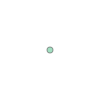

In [51]:
from shapely import Point, LineString,polygons,linearrings
draw.Point(5.2, 52.1)

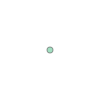

In [52]:
from shapely import from_wkb, from_wkt
from_wkt("POINT (5.2 52.1)")

In [53]:
polygons(ring_1, holes=[ring_2])

NameError: name 'ring_1' is not defined

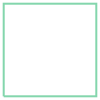

In [55]:
ring_1 = linearrings([[0, 0], [0, 10], [10, 10], [10, 0]])
ring_1

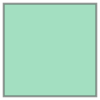

In [70]:
ring_2 = linearrings([[2, 6], [2, 7], [3, 7], [3, 6]])
polygons([ring_1, ring_2])[0]
# ring_2

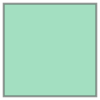

In [71]:
polygons([[0, 0], [0, 10], [10, 10], [10, 0]])

In [73]:
draw.polygons(ring_1, holes=[ring_2])

AttributeError: module 'qiskit_metal.draw' has no attribute 'polygons'

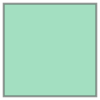

In [74]:
polygons([ring_1, None], indices=[0, 0])[0]

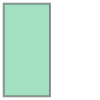

In [75]:
draw.box(1,2,0,0)

In [98]:
h1 = draw.shapely.linearrings([[0, 0], [0, 10], [10, 10], [10, 0]])
shapely.get_coordinates(h1)

array([[ 0.,  0.],
       [ 0., 10.],
       [10., 10.],
       [10.,  0.],
       [ 0.,  0.]])

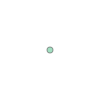

In [79]:
draw.Point(0,0)

In [100]:
from shapely import Point, buffer, prepare, contains_properly
poly = buffer(Point(1.0, 5.0), 0.1)
draw.shapely.prepare(poly)
poly
shapely.get_coordinates(poly).tolist()

[[1.1, 5.0],
 [1.0980785280403231, 4.980490967798387],
 [1.0923879532511287, 4.961731656763491],
 [1.0831469612302544, 4.94444297669804],
 [1.0707106781186548, 4.929289321881345],
 [1.0555570233019602, 4.916853038769745],
 [1.038268343236509, 4.907612046748872],
 [1.019509032201613, 4.901921471959677],
 [1.0, 4.9],
 [0.9804909677983872, 4.901921471959677],
 [0.961731656763491, 4.907612046748872],
 [0.9444429766980398, 4.916853038769745],
 [0.9292893218813453, 4.929289321881345],
 [0.9168530387697454, 4.94444297669804],
 [0.9076120467488713, 4.961731656763491],
 [0.901921471959677, 4.980490967798387],
 [0.9, 5.0],
 [0.901921471959677, 5.019509032201613],
 [0.9076120467488713, 5.038268343236509],
 [0.9168530387697454, 5.05555702330196],
 [0.9292893218813453, 5.070710678118655],
 [0.9444429766980398, 5.083146961230255],
 [0.9617316567634909, 5.092387953251128],
 [0.9804909677983872, 5.098078528040323],
 [1.0, 5.1],
 [1.019509032201613, 5.098078528040323],
 [1.038268343236509, 5.0923879532

In [81]:
contains_properly(poly, [Point(0.0, 0.0), Point(0.5, 0.5)]).tolist()

[False, True]

In [96]:
r1 = draw.rectangle( 1.5,1,4.9,0)
c4 = draw.subtract( c3,r1)
r2 = draw.rectangle(0.7,0.2,4.9,0)
# draw.shapely.geometry.box(1,2,0,0)
f1 = draw.shapely.union( c4,r2)

In [97]:
shapely.get_coordinates(f1)

array([[ 5.74164201e+00, -1.74170806e+00],
       [ 5.54327720e+00, -2.29610059e+00],
       [ 5.29152759e+00, -2.82838042e+00],
       [ 4.98881767e+00, -3.33342140e+00],
       [ 4.63806272e+00, -3.80635970e+00],
       [ 4.24264069e+00, -4.24264069e+00],
       [ 3.80635970e+00, -4.63806272e+00],
       [ 3.33342140e+00, -4.98881767e+00],
       [ 2.82838042e+00, -5.29152759e+00],
       [ 2.29610059e+00, -5.54327720e+00],
       [ 1.74170806e+00, -5.74164201e+00],
       [ 1.17054193e+00, -5.88471168e+00],
       [ 5.88102842e-01, -5.97110836e+00],
       [ 3.67394040e-16, -6.00000000e+00],
       [-5.88102842e-01, -5.97110836e+00],
       [-1.17054193e+00, -5.88471168e+00],
       [-1.74170806e+00, -5.74164201e+00],
       [-2.29610059e+00, -5.54327720e+00],
       [-2.82838042e+00, -5.29152759e+00],
       [-3.33342140e+00, -4.98881767e+00],
       [-3.80635970e+00, -4.63806272e+00],
       [-4.24264069e+00, -4.24264069e+00],
       [-4.63806272e+00, -3.80635970e+00],
       [-4.

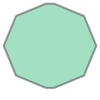

In [179]:
a = LineString([[0, 0], [1, 0]]).buffer(5,join_style = 'mitre'
                                              ,quad_segs = 2,mitre_limit = 500)
a

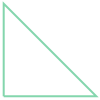

In [205]:
ring = shapely.LinearRing( ((0, 0), (0, 1), (1,0)) )
# buffer(0.06,
                                                                       
                # cap_style = 'square',join_style = 'mitre')
ring

In [199]:
list(ring.coords)

[(0.0, 0.0), (0.0, 1.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0)]

In [201]:
ring.length

4.0

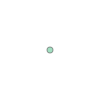

In [202]:
ring.centroid

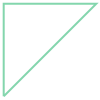

In [246]:
coords = ((0., 0.), (0., 1.), (1., 1.))
polygon = shapely.Polygon(coords)
shapely.get_num_coordinates(polygon).tolist()
shapely.get_x( polygon ) # return the x of a point 
shapely.get_exterior_ring( polygon ) 

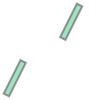

In [221]:
from shapely import Point
ob = shapely.MultiPoint([[0.0, 0.0], [1.0, 2.0]])
ob
lines = shapely.MultiLineString([[[0, 0], [1, 2]], [[4, 4], [5, 6]]]).buffer(0.21, cap_style = 'square')
lines

In [241]:
from shapely import Polygon
ob = draw.shapely.MultiPolygon([
    (
    ((0.0, 0.0), (0.0, 1.0), (1.0, 1.0), (1.0, 0.0)),
    [((0.1,0.1), (0.1,0.2), (0.2,0.2), (0.2,0.1))]
    )
]).buffer(0.000000005)
shapely.get_dimensions( ob)
shapely.get_num_coordinates( ob )

74

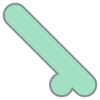

In [237]:
from shapely import LineString, Point
p = Point(51, -1)
l = LineString([(52, -1), (49, 2)])
gc = shapely.GeometryCollection([p, l])
gc.buffer(0.5)

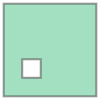

In [256]:
from shapely import Point, Polygon
polygon_with_hole = Polygon(
    [(0, 0), (0, 10), (10, 10), (10, 0), (0, 0)],
    holes=[[(2, 2), (2, 4), (4, 4), (4, 2), (2, 2)]]
)
polygon_with_hole

In [261]:
shapely.get_interior_ring( polygon_with_hole
                         ,1)
shapely.get_num_points( polygon_with_hole) # return num of points in limstring 


0

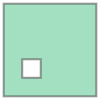

In [263]:
from shapely import LineString, Point
shapely.force_3d(polygon_with_hole, z=3)

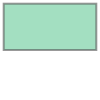

In [265]:
from shapely import normalize, Polygon
polygon_1 = Polygon([(0, 0), (0, 1), (1, 1), (1, 0), (0, 0)])
polygon_2 = Polygon([(1, 0), (1, 1), (2, 1), (2, 0), (1, 0)])
normalize(shapely.coverage_union_all([polygon_1, polygon_2]))

In [270]:
polygon_1,

(<POLYGON ((0 0, 0 1, 1 1, 1 0, 0 0))>, <POLYGON ((1 0, 1 1, 2 1, 2 0, 1 0))>)

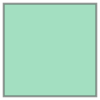

In [271]:
polygon_2

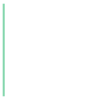

In [274]:
from shapely import LineString
line = LineString([(0, 0), (0, 2)])
# shapely.offset_curve(line, 2)
line

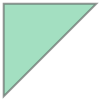

In [280]:
from shapely import LineString
lines = [
    LineString([(0, 0), (1, 1)]),
    LineString([(0, 0), (0, 1)]),
    LineString([(0, 1), (1, 1)])
]
shapely.polygonize(lines)


In [283]:
from shapely import LineString
lines = [
    LineString([(0, 0), (1, 1)]),
    LineString([(0, 0), (0, 1), (1, 1)]),
    LineString([(0, 1), (1, 1)])
]
shapely.polygonize_full(lines)

(<GEOMETRYCOLLECTION (POLYGON ((1 1, 0 0, 0 1, 1 1)))>,
 <GEOMETRYCOLLECTION EMPTY>,
 <GEOMETRYCOLLECTION (LINESTRING (0 1, 1 1))>,
 <GEOMETRYCOLLECTION EMPTY>)

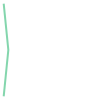

In [286]:
from shapely import LineString, Polygon
line = LineString([(0, 0), (1, 10), (0, 20)])
shapely.simplify(line, tolerance=0.1)

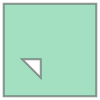

In [294]:
polygon_with_hole = Polygon(
    [(0, 0), (0, 10), (10, 10), (10, 0), (0, 0)],
    holes=[[(2, 2), (2, 4), (4, 4), (4, 2), (2, 2)]]
)
shapely.simplify(polygon_with_hole, tolerance=5, preserve_topology=True)

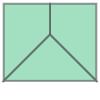

In [306]:
from shapely import LineString, MultiPoint, normalize, Point
points = MultiPoint([(1,0),(0,-1),(-1,0)])
normalize(shapely.voronoi_polygons(points,tolerance = 0.05))
# points

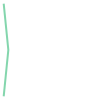

In [316]:
from shapely import LineString, Point
shapely.transform(line, lambda x: x+50)